In [1]:
import mglearn 
import matplotlib.pyplot as plt

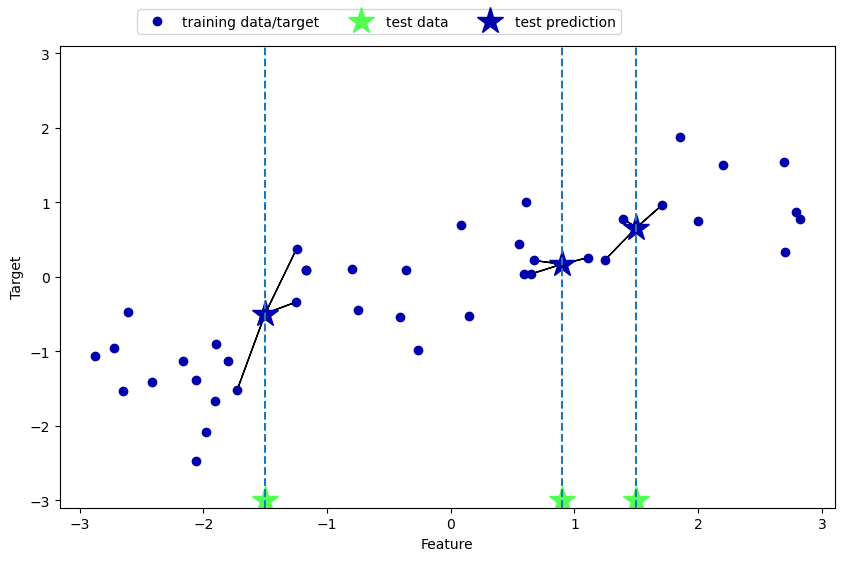

In [2]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
import numpy as np
plt.style.use('ggplot')
X, y = mglearn.datasets.make_wave(n_samples=20)# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7)# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print(reg.score(X_test, y_test))

0.425035504962579


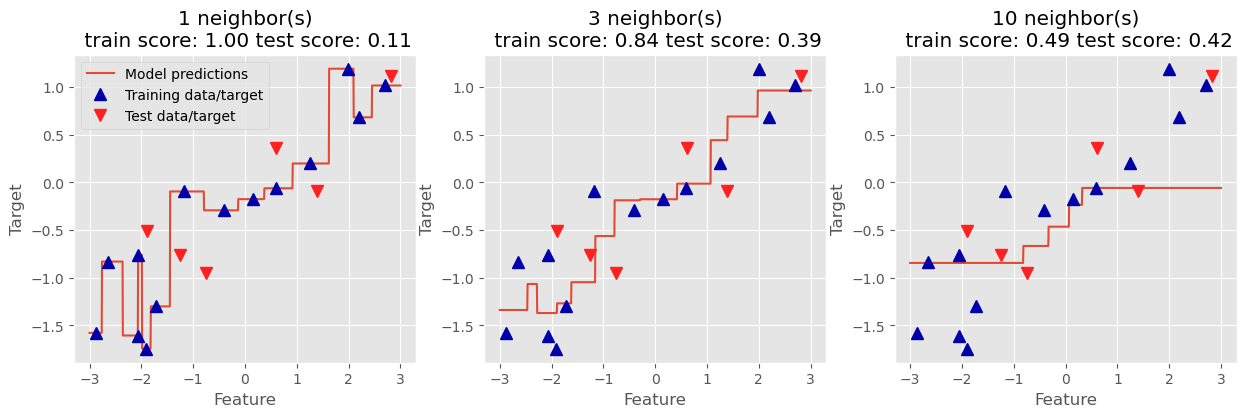

In [9]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 10], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0),   
             markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.score(X_train, y_train),reg.score(X_test, 
              y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

In [5]:
class KNNR():
    def __init__(self,d='euclidean',weights='uniform'):
        assert weights in ['uniform','weighted'],'input uniform or weighted'
        self.weights=weights
        self.dist={'euclidean':2,'minkowski':2,'manhattan':1}
        self.d=d
        assert d in {'euclidean':2,'minkowski':2,'manhattan':1}, "distance must be one of this euclidean, minkowski, manhattan"
        if d=='minkowski':
            pass
            self.dist[d]=int(input('input p '))
            
    def fit(self,x,y,n=1):
        assert n<len(x), "n must be <= len(x)"
        self.n=n
        self.x=x
        self.y=y
        
    def acc(self,y,y_p):
        r=r2_score(y,y_p)
        if r>0:
            return r
        else: return 0
        
    def predict(self,x):
        self.y_pred=[]
        self.x_pred=[]
        
        for i in range(x.shape[0]):
            a=[]
            for j in range(self.x.shape[0]):
                summa=0
                for k in range(x.shape[1]):
                    summa+=np.abs(x[i][k]-self.x[j][k])**self.dist[self.d]
                summa=summa**1/self.dist[self.d]
                a.append(summa)
            self.x_pred.append(a)
        self.x_pred=np.array(self.x_pred)
        for i in range(self.x_pred.shape[0]):
            if self.weights == 'uniform':
                self.y_pred.append(np.mean(self.y[(np.argsort(self.x_pred[i])[:self.n])]))
            elif self.weights == 'weighted':
                w=np.array([1/self.x_pred[i,np.argsort(self.x_pred[i])[:self.n]]]).reshape(-1,1)
                if w[0]==np.inf:
                    w[0]=1000000000000000000
                k=self.y[(np.argsort(self.x_pred[i])[:self.n])].reshape(-1,1)
                fy=self.y[(np.argsort(self.x_pred[i])[:self.n])]@w
                fy=fy/sum(w)
                self.y_pred.append(fy)
        return np.array(self.y_pred).reshape(-1,1)

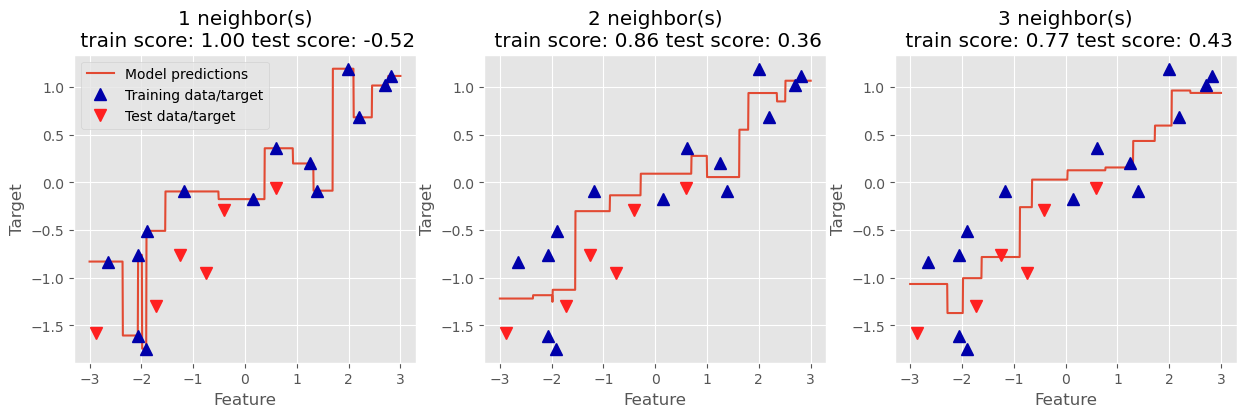

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 2, 3], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) #using the class written by me
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.score(X_train, y_train),reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

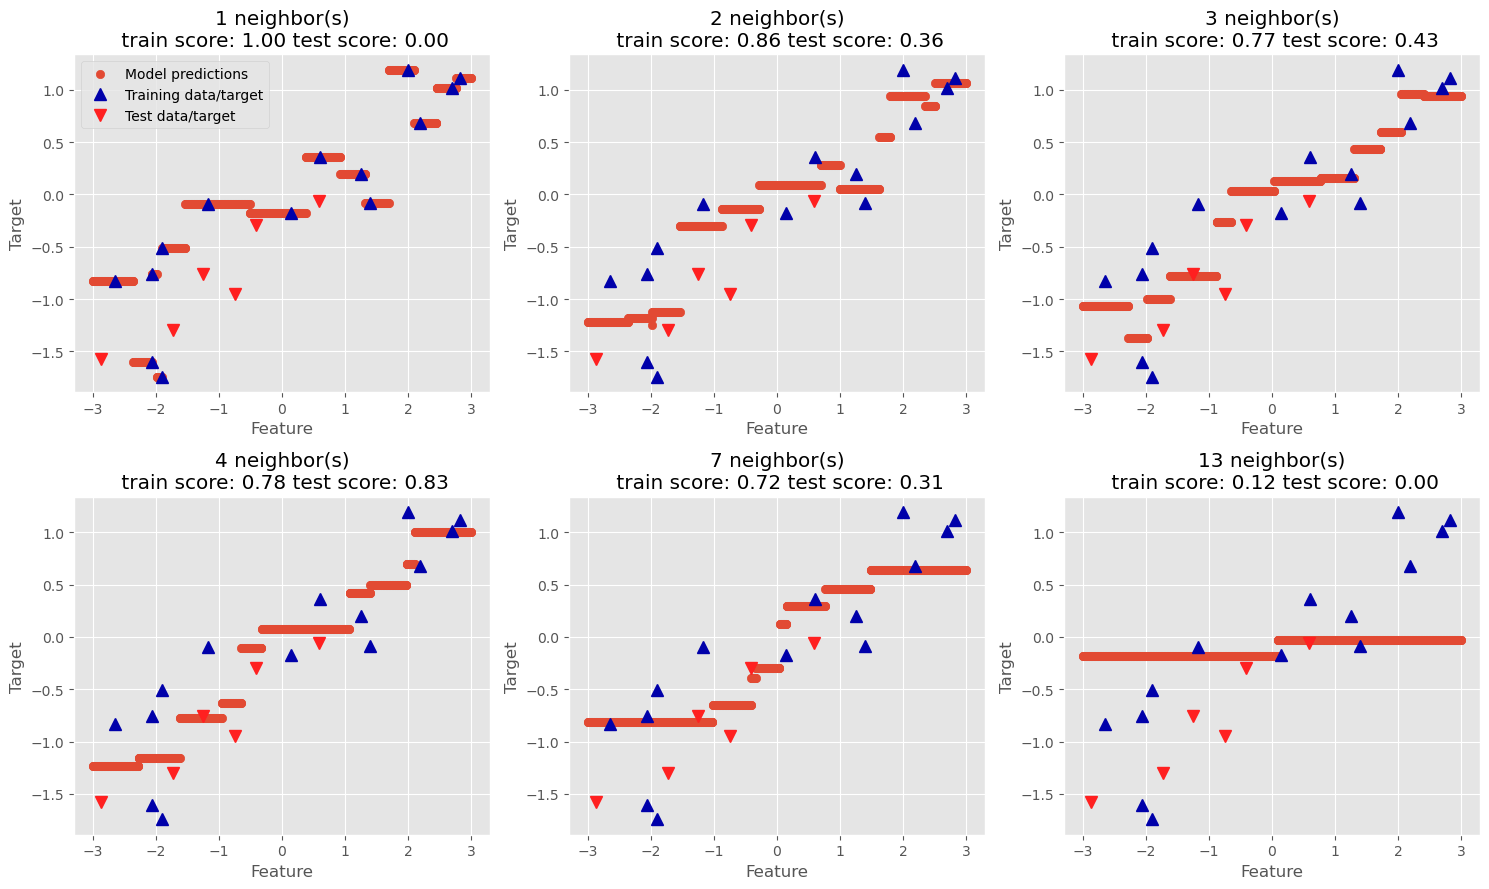

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 2 ,3, 4, 7, 13], axes.flatten()):
    reg = KNNR() #using the class written by me
    reg.fit(X_train, y_train,n_neighbors)
    y_predtt=reg.predict(X_test)
    y_predtn=reg.predict(X_train)
    ax.scatter(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.acc(y_train,y_predtn),reg.acc(y_test,y_predtt)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0,0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")
    plt.tight_layout()

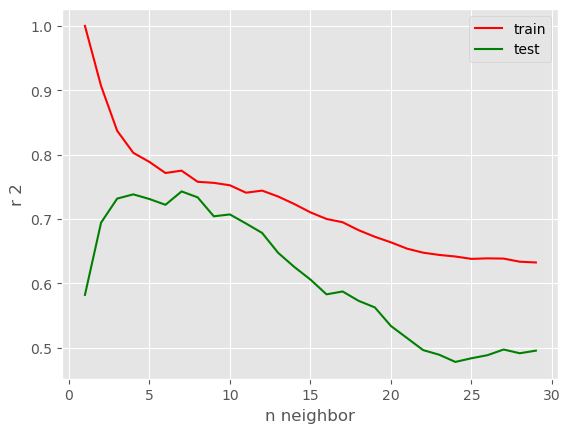

In [11]:
k=30
a=[]
b=[]
for i in range(1,k):
    model=KNNR('euclidean')
    model.fit(X_train,y_train,i)
    y_pred=model.predict(X_test)
    a.append(model.acc(y_test,y_pred))
    y_pred=model.predict(X_train)
    b.append(model.acc(y_train,y_pred))

plt.plot(np.arange(1,k),b,c='r',label='train')
plt.plot(np.arange(1,k),a,c='g', label='test')
plt.xlabel('n neighbor')
plt.ylabel('r 2')
plt.legend()
plt.show()

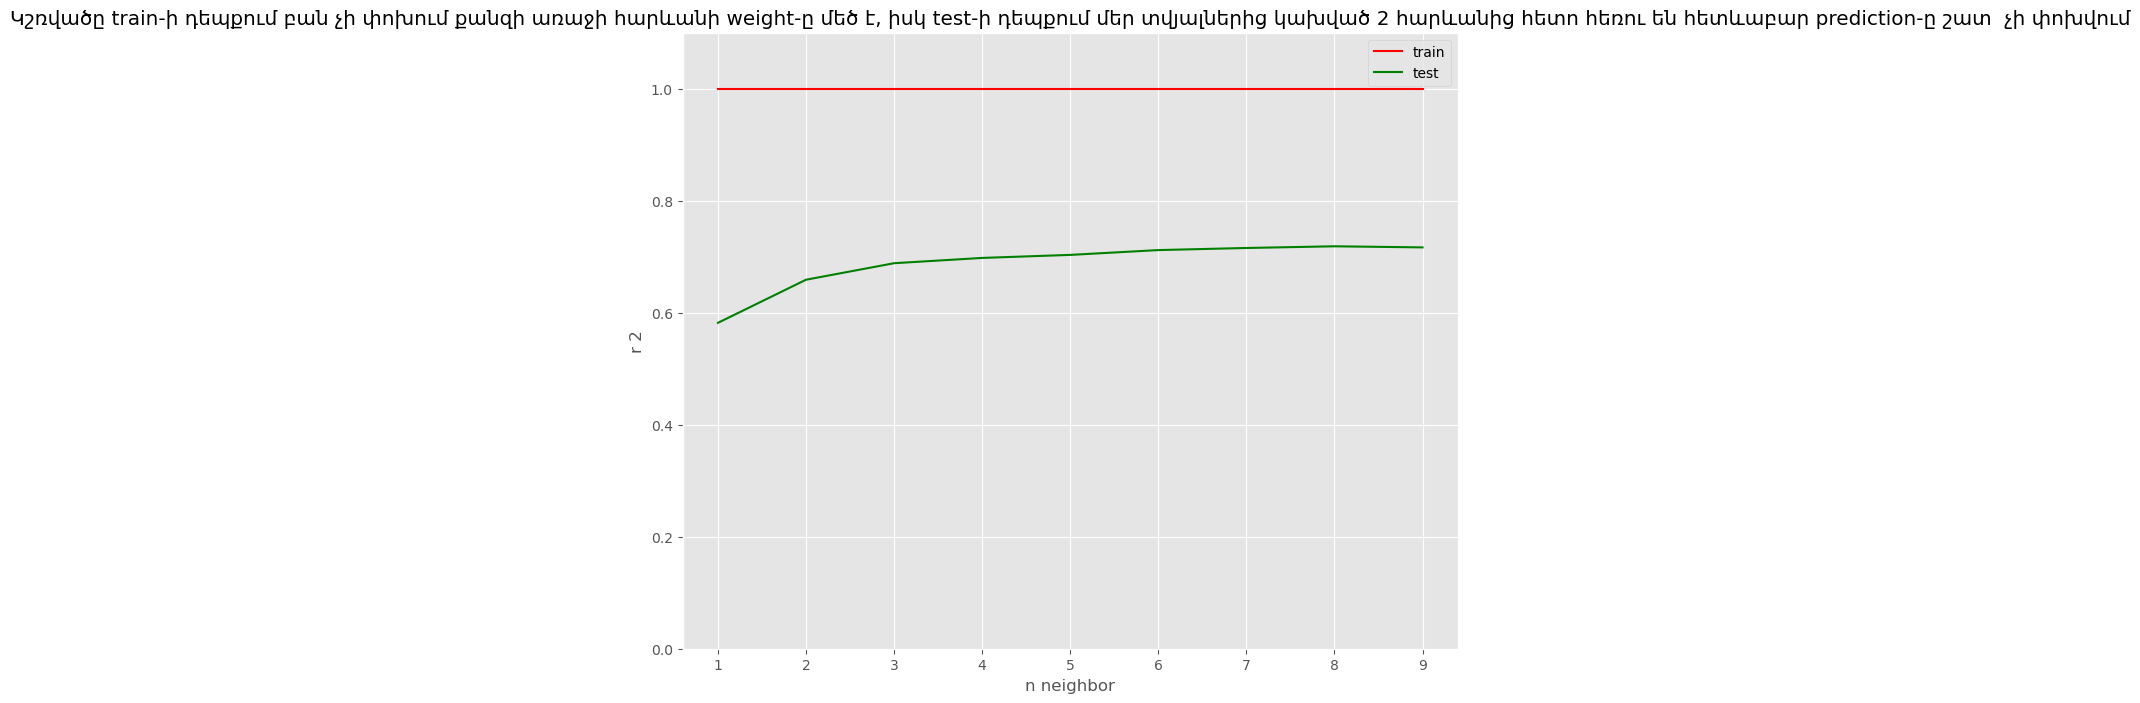

In [12]:
k=10
a=[]
b=[]
for i in range(1,k):
    model=KNNR('euclidean','weighted')
    model.fit(X_train,y_train,i)
    y_pred=model.predict(X_train)
    b.append(model.acc(y_train,y_pred))
    y_pred=model.predict(X_test)
    a.append(model.acc(y_test,y_pred))

plt.figure(figsize=(10,8))
plt.plot(np.arange(1,k),b,c='r',label='train')
plt.plot(np.arange(1,k),a,c='g', label='test')
plt.xlabel('n neighbor')
plt.ylabel('r 2')
plt.legend()
plt.title('Կշռվածը train-ի դեպքում բան չի փոխում քանզի առաջի հարևանի weight-ը մեծ է, իսկ test-ի դեպքում մեր տվյալներից կախված 2 հարևանից հետո հեռու են հետևաբար prediction-ը շատ  չի փոխվում')
plt.ylim(0,1.1)
plt.show()

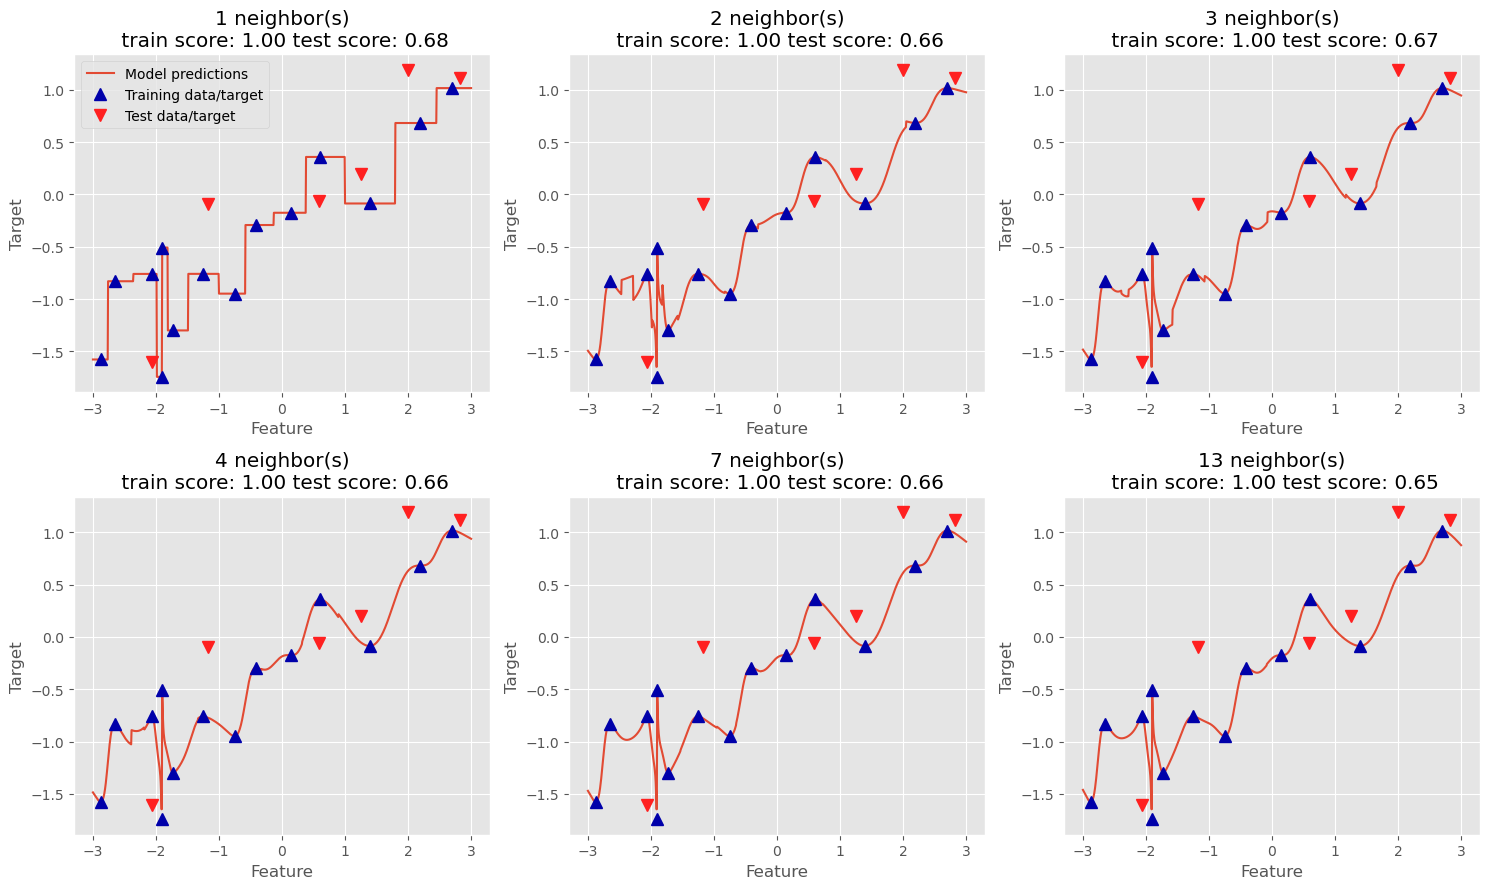

In [140]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 2 ,3, 4, 7, 13], axes.flatten()):
    reg = KNNR(weights='weighted') #using wei
    reg.fit(X_train, y_train,n_neighbors)
    y_predtt=reg.predict(X_test)
    y_predtn=reg.predict(X_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.acc(y_train,y_predtn),reg.acc(y_test,y_predtt)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0,0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")
    plt.tight_layout()

In [142]:
xnew,ynew=make_regression(n_samples=100, n_features=3, n_informative=2,random_state=1)
xnew=xnew[:,:2]
X_train1, X_test1, y_train1, y_test1 = train_test_split(xnew, ynew, train_size=0.7,random_state=1)

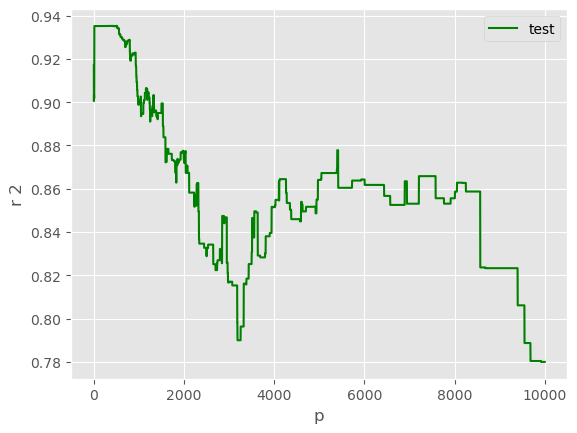

In [29]:
k=10000
a=[]

model=KNNR('minkowski')

for i in range(1,k):
    model.dist['minkowski']=i
    model.fit(X_train1,y_train1,2)
    y_pred1=model.predict(X_test1)
    a.append(model.acc(y_test1,y_pred1))

plt.plot(np.arange(1,k),a,c='g', label='test')
plt.xlabel('p')
plt.ylabel('r 2')
plt.legend()
plt.show()